Eigenvectors 
[[ 6.47093729e-02  6.28275866e-01 -4.21668945e-01 -2.20721584e-01
   6.47029345e-03 -4.46449902e-01 -4.18569035e-01]
 [ 3.78760904e-01  2.69706650e-01  7.46027442e-01 -1.05931982e-02
   3.87982788e-01  1.71520299e-04 -2.76764643e-01]
 [ 4.46665915e-01 -2.34379085e-01 -1.99308714e-01 -5.07042158e-01
  -1.73367634e-01  5.25402868e-01 -3.77671525e-01]
 [ 4.71889526e-01  1.10990417e-01  5.62726863e-02  5.52398549e-01
  -6.70885701e-01 -5.88609281e-02 -5.60214003e-02]
 [ 4.35702887e-01 -2.01661652e-01 -4.55168874e-01  4.46276890e-01
   6.02614079e-01 -3.13098518e-03  5.24323817e-04]
 [-4.24913712e-01 -3.20312078e-01  5.22365058e-02  3.34339481e-01
  -7.43689883e-03  5.08853525e-04 -7.76067911e-01]
 [ 2.44487304e-01 -5.67457559e-01  1.13315588e-01 -2.79263154e-01
  -7.80031747e-02 -7.21913853e-01 -1.20598098e-02]]

Eigenvalues 
[4.18573434e+00 2.29811778e+00 4.15948838e-01 9.54925358e-02
 2.77695834e-02 3.38738483e-04 9.55061572e-06]
Eigenvalues in descending order:
4.185734344

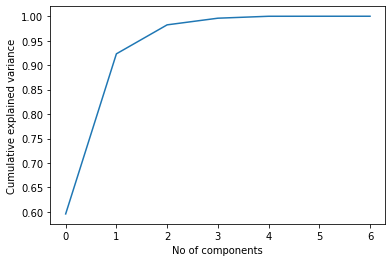

Jumlah fitur terbaik: 3


,PC3,PC1,PC2,target
0,5.010343,2.679215,-0.039327,A
1,5.023755,2.529295,-0.097056,A
2,4.805439,2.673700,-0.075475,A
3,4.469543,2.285029,-0.120233,A
4,4.471893,2.159152,-0.000738,A


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')

df = pd.read_csv('Pizza.csv')
df.head()

df = df.drop(['Brand'],axis = 1)
df.head()

# ### Stadardizing the data
from sklearn.preprocessing import StandardScaler
df_std = StandardScaler().fit_transform(df)
df_std


# ### Calculating covariance matrix
df_cov_matrix = np.cov(df_std.T)
df_cov_matrix


# ### Calculating Eigendecomposition
eig_vals, eig_vecs = np.linalg.eig(df_cov_matrix)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)


# ### Sorting Eigenvalues
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])


# ### Calculating cumulative variance to select number of components
total = sum(eig_vals)
var_exp = [(i / total)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Variance captured by each component is \n",var_exp)
print("Cumulative variance captured as we travel with each component \n",cum_var_exp)

df1 = pd.read_csv('Pizza.csv')


# ### Scree plot for visualization
from sklearn.decomposition import PCA
pca = PCA().fit(df_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No of components')
plt.ylabel('Cumulative explained variance')
plt.show()

# Summary.
n_features_reduced = len([x for x in cum_var_exp if x <= 99])
print("Jumlah fitur terbaik: {}".format(n_features_reduced))

# ### Creating 3 Principal components
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
pcs = pca.fit_transform(df_std)
df_new = pd.DataFrame(data=pcs, columns={'PC1','PC2','PC3'})
df_new['target'] = df1['Brand'] 
df_new.head()